# Ejercitación espacios de color

Segmentación por color

In [3]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

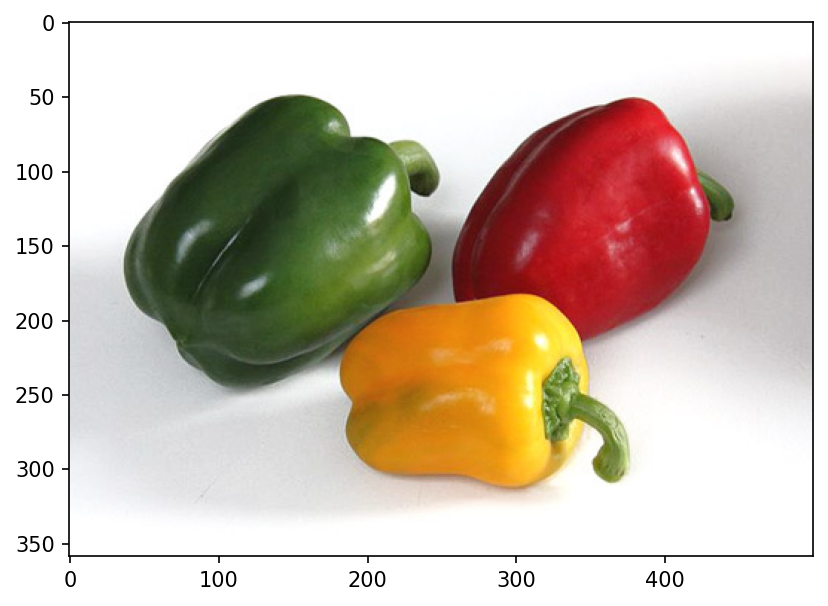

In [4]:
# Cargar la imagen color
img_color = cv.imread('pimiento_morron.jpg')
if img_color is None:
    print("La imagen no se cargó correctamente")
else:
    imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

    plt.figure(1)
    plt.imshow(imgRGB)
    plt.show()

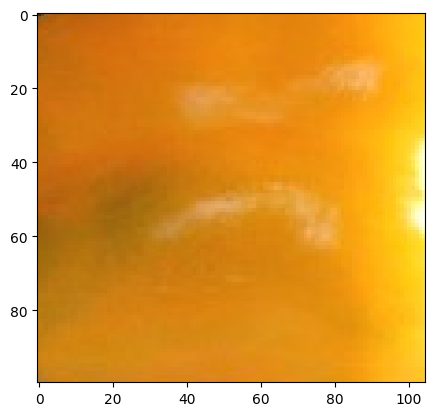

In [51]:
# Tomamos una muestra del morron amarillo
img_muestra_amarillo = imgRGB[200:300, 205:310,:]
plt.figure(2)
plt.imshow(img_muestra_amarillo)
plt.show()

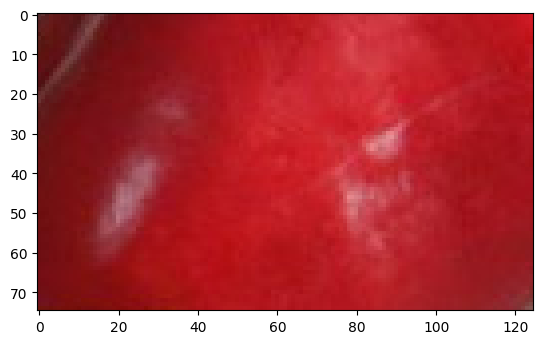

In [71]:
# Tomamos una muestra del morron rojo
img_muestra_rojo = imgRGB[105:180, 285:410,:]
plt.figure(3)
plt.imshow(img_muestra_rojo)
plt.show()

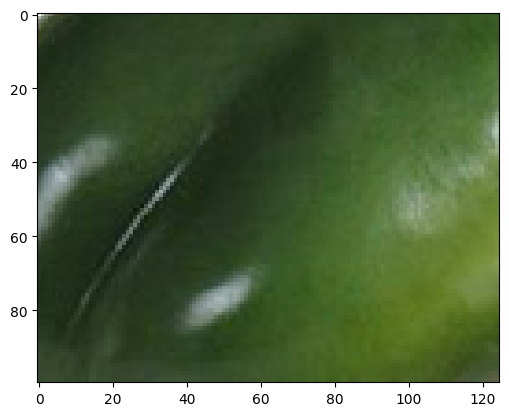

In [80]:
# Tomamos una muestra del morron verde
img_muestra_verde = imgRGB[100:200, 75:200,:]
plt.figure(4)
plt.imshow(img_muestra_verde)
plt.show()

In [52]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón amarillo en el espacio RGB
color_mean_amarillo, color_std_amarillo = cv.meanStdDev(img_muestra_amarillo)
print(color_mean_amarillo.flatten().tolist())
print(color_std_amarillo.flatten().tolist())

[221.55895238095238, 140.95733333333334, 22.124761904761904]
[23.289749448602663, 27.75028251307637, 18.059585403416953]


In [72]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean_rojo, color_std_rojo = cv.meanStdDev(img_muestra_rojo)
print(color_mean_rojo.flatten().tolist())
print(color_std_rojo.flatten().tolist())

[167.89877333333334, 30.43872, 37.26773333333333]
[30.548523038415823, 16.186343361867333, 17.66909464372436]


In [81]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón verde en el espacio RGB
color_mean_verde, color_std_verde = cv.meanStdDev(img_muestra_verde)
print(color_mean_verde.flatten().tolist())
print(color_std_verde.flatten().tolist())

[60.15576000000001, 83.42664, 42.70264]
[25.533851625291458, 28.716938177848977, 21.457231345874987]


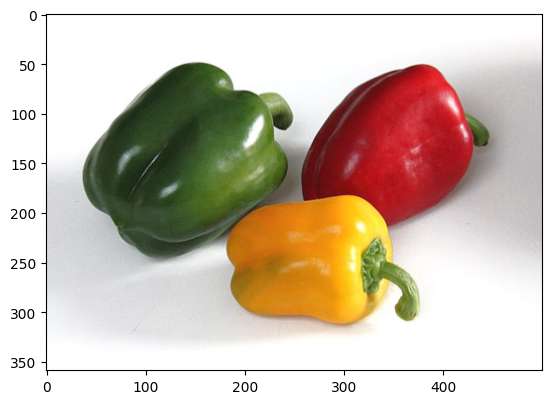

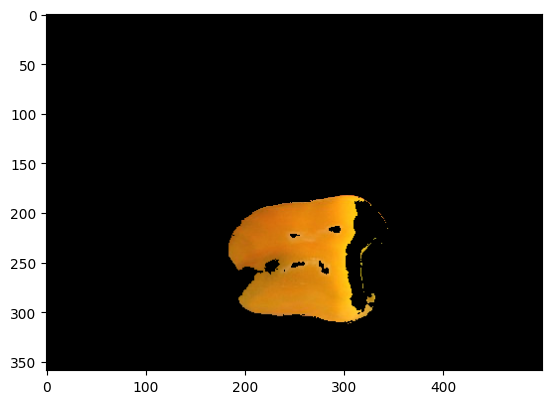

<function matplotlib.pyplot.show(close=None, block=None)>

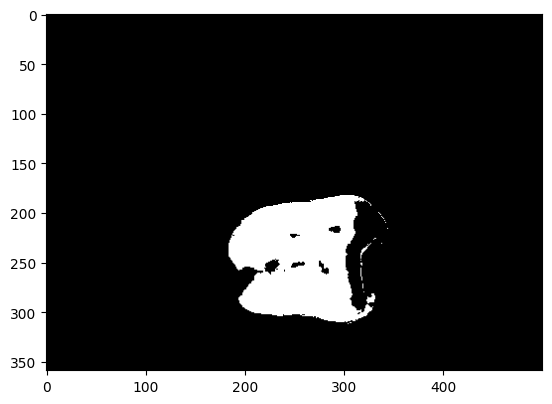

In [59]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 2.3
mask_amarillo = cv.inRange(imgRGB, color_mean_amarillo-color_std_amarillo * n_sigma,  color_mean_amarillo+color_std_amarillo * n_sigma)
img_segmentada_amarillo = cv.bitwise_and(imgRGB, imgRGB, mask=mask_amarillo)


plt.figure(99)
plt.imshow(imgRGB)
plt.show()

plt.figure(5)
plt.imshow(img_segmentada_amarillo)
plt.show()

plt.figure(6)
plt.imshow(mask_amarillo,cmap='gray')
plt.show

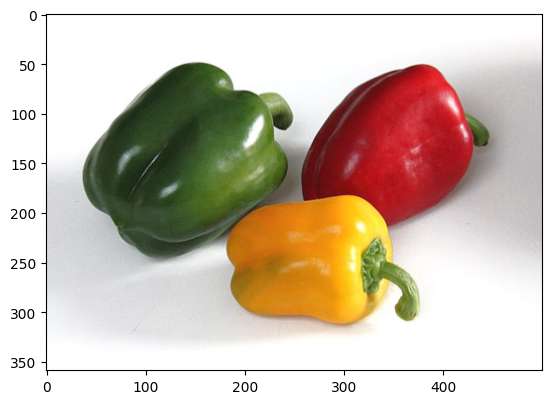

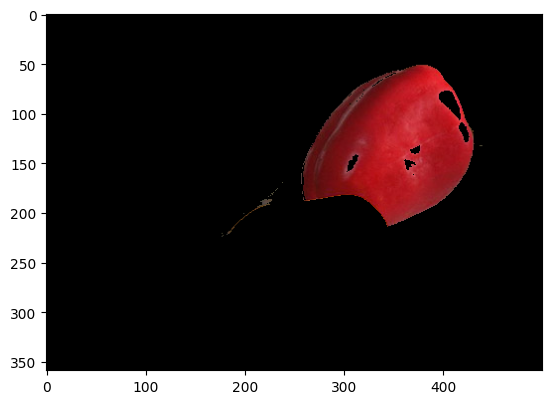

<function matplotlib.pyplot.show(close=None, block=None)>

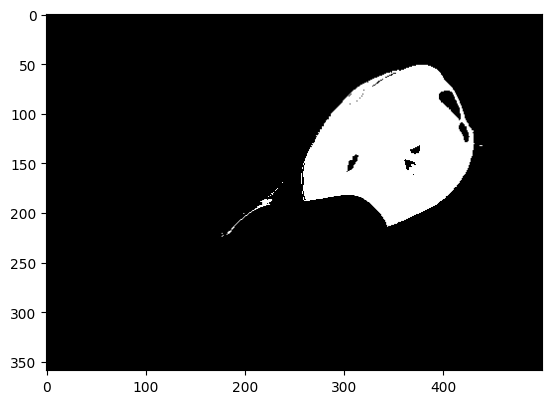

In [76]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask_rojo = cv.inRange(imgRGB, color_mean_rojo-color_std_rojo * n_sigma,  color_mean_rojo+color_std_rojo * n_sigma)
img_segmentada_rojo = cv.bitwise_and(imgRGB, imgRGB, mask=mask_rojo)


plt.figure(99)
plt.imshow(imgRGB)
plt.show()

plt.figure(7)
plt.imshow(img_segmentada_rojo)
plt.show()

plt.figure(8)
plt.imshow(mask_rojo,cmap='gray')
plt.show

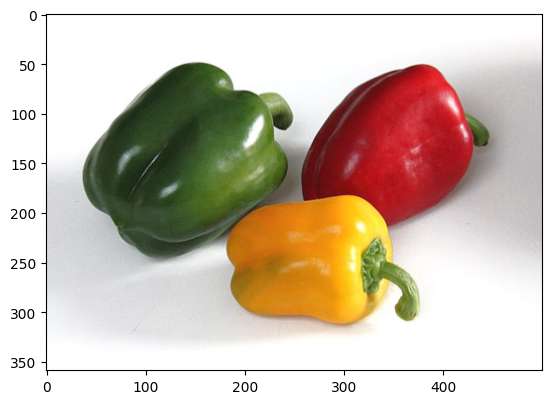

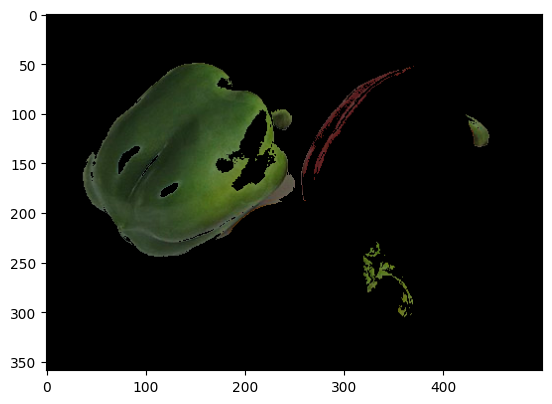

<function matplotlib.pyplot.show(close=None, block=None)>

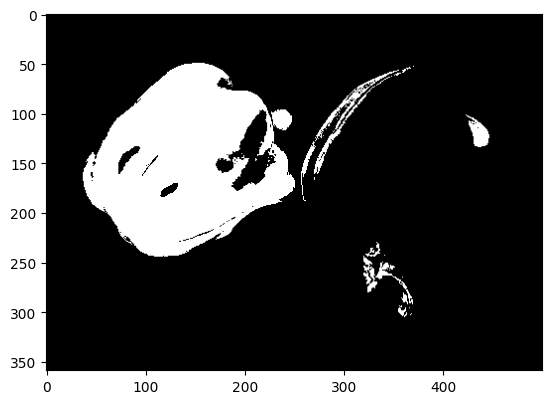

In [83]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 2
mask_verde = cv.inRange(imgRGB, color_mean_verde-color_std_verde * n_sigma,  color_mean_verde+color_std_verde * n_sigma)
img_segmentada_verde = cv.bitwise_and(imgRGB, imgRGB, mask=mask_verde)


plt.figure(99)
plt.imshow(imgRGB)
plt.show()

plt.figure(9)
plt.imshow(img_segmentada_verde)
plt.show()

plt.figure(10)
plt.imshow(mask_verde,cmap='gray')
plt.show

Veamos la distribucion de colores

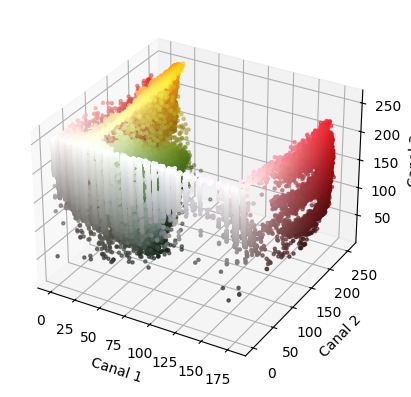

In [88]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(img_HSV)

# c1, c2, c3 = cv.split(imgRGB)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

(17.2744, 229.38400000000001, 213.66680000000002, 0.0)


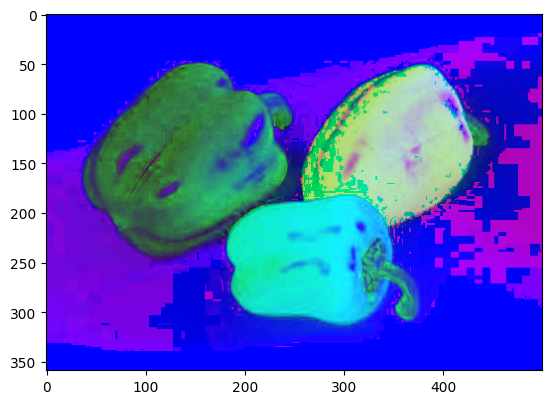

In [87]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[230:280,230:280,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)

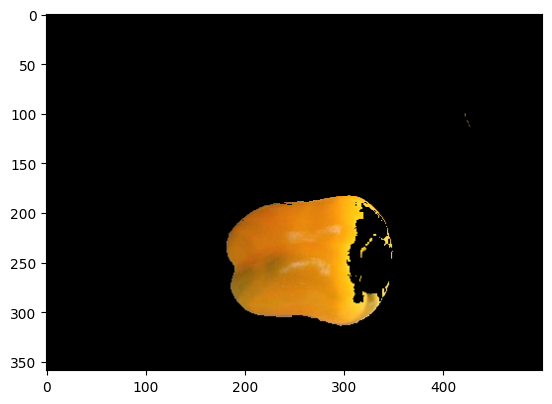

In [89]:
color_l = (14,100,100)
color_u = (24,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()